<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

<img src="daisy2.JPG" />

In [ ]:
!pip install opencv-python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

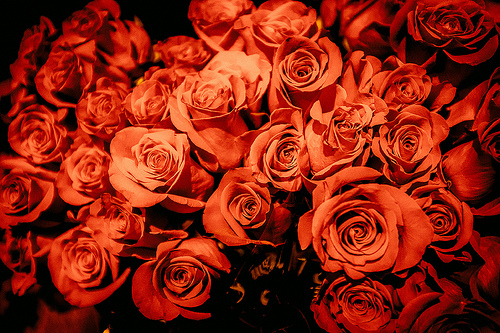

In [10]:
PIL.Image.open(str(roses[2]))

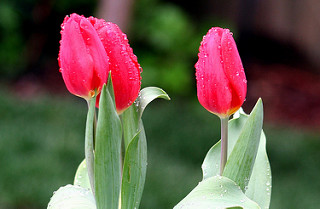

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [21]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [22]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [23]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [24]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [25]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [26]:
img.shape

(240, 179, 3)

In [27]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [28]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [31]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [33]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [34]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)              

Epoch 1/10
86/86 [==============================] - 33s 371ms/step - loss: 1.3065 - accuracy: 0.4549
Epoch 2/10
86/86 [==============================] - 39s 448ms/step - loss: 0.9659 - accuracy: 0.6152
Epoch 3/10
86/86 [==============================] - 39s 454ms/step - loss: 0.8148 - accuracy: 0.6897
Epoch 4/10
86/86 [==============================] - 39s 455ms/step - loss: 0.5986 - accuracy: 0.7805
Epoch 5/10
86/86 [==============================] - 39s 452ms/step - loss: 0.3959 - accuracy: 0.8547
Epoch 6/10
86/86 [==============================] - 36s 420ms/step - loss: 0.2112 - accuracy: 0.9262
Epoch 7/10
86/86 [==============================] - 35s 412ms/step - loss: 0.1149 - accuracy: 0.9658
Epoch 8/10
86/86 [==============================] - 36s 414ms/step - loss: 0.1290 - accuracy: 0.9608
Epoch 9/10
86/86 [==============================] - 35s 412ms/step - loss: 0.0764 - accuracy: 0.9782
Epoch 10/10
86/86 [==============================] - 36s 413ms/step - loss: 0.0349 - accura

In [35]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 59ms/step - loss: 2.0911 - accuracy: 0.6362


[2.0910849571228027, 0.6361655592918396]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [128]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 2s 52ms/step


array([[ 1.2298816 ,  6.4429827 , -0.6558552 , -3.4891622 ,  0.6037566 ],
       [ 3.402393  , -0.35892886, -3.9647017 , -2.1752214 ,  2.9494758 ],
       [ 0.9092747 ,  2.2170486 ,  5.147292  , -3.3594553 , -0.22321402],
       ...,
       [ 1.7009882 , -1.0047296 ,  1.3729722 ,  6.0419793 ,  1.4942355 ],
       [ 2.909115  ,  0.06451686, -0.79175335, -3.354546  ,  0.33538795],
       [ 1.743523  , -3.499492  ,  1.3156786 ,  3.9956434 ,  2.4466083 ]],
      dtype=float32)

In [145]:
score = tf.nn.softmax(predictions[5])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.7813437e-06, 1.6145489e-08, 4.2486965e-04, 9.9928349e-01,
       2.8983856e-04], dtype=float32)>

In [146]:
np.argmax(score)

3

In [147]:
y_test[5]

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4, 1, 3, 2, 3, 4, 2, 1, 1, 0, 2, 2, 2,
       1, 2, 3, 0, 2, 4, 4, 0, 4, 2, 2, 3, 1, 1, 2, 2, 4, 1, 4, 4, 4, 4,
       2, 3, 3, 3, 2, 1, 0, 0, 2, 4, 1, 2, 0, 3, 4, 4, 0, 2, 4, 4, 2, 3,
       2, 0, 4, 4, 2, 2, 2, 0, 1, 0, 4, 1, 2, 0, 4, 2, 3, 1, 1, 4, 2, 3,
       0, 2, 0, 2, 2, 4, 3, 3, 1, 0, 1, 3, 2, 2, 4, 0, 4, 2, 0, 1, 0, 0,
       1, 0, 3, 3, 4, 3, 0, 0, 1, 0, 0, 1, 0, 4, 1, 2, 2, 0, 4, 2, 3, 0,
       4, 1, 0, 1, 3, 4, 3, 3, 3, 0, 4, 0, 2, 1, 0, 3, 2, 2, 4, 2, 0, 2,
       0, 1, 4, 2, 2, 0, 3, 0, 1, 4, 0, 3, 0, 1, 4, 0, 4, 4, 0, 0, 0, 4,
       3, 1, 4, 3, 2, 2, 4, 1, 1, 4, 2, 2, 2, 2, 4, 3, 2, 1, 4, 4, 2, 4,
       3, 2, 4, 2, 2, 4, 4, 0, 2, 2, 4, 0, 3, 3, 2, 3, 0, 1, 0, 0, 0, 4,
       0, 2, 2, 4, 1, 2, 1, 2, 3, 3, 0, 1, 0, 3, 2, 2, 1, 3, 3, 4, 4, 4,
       2, 3, 2, 0, 0, 0, 4, 3, 4, 0, 0, 2, 0, 3, 0, 1, 0, 2, 2, 1, 3, 4,
       1, 0, 2, 1, 3, 0, 4, 2, 4, 1, 4, 0, 0, 1, 2, 0, 0, 3, 3, 4, 1, 4,
       4, 2, 2, 1, 2, 1, 2, 4, 2, 1, 4, 4, 0, 1, 4,

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [86]:
data_augmentation = keras.Sequential([
    
    layers.experimental.preprocessing.RandomCrop(100, 100, seed=None),
    layers.experimental.preprocessing.RandomContrast(0.5),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

**Original Image**

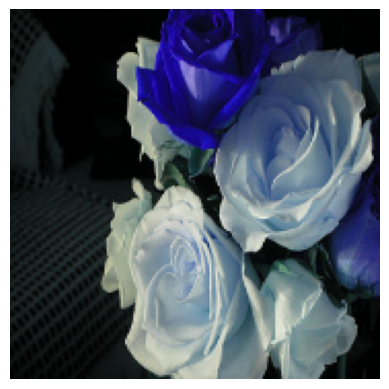

In [87]:
plt.axis('off')
plt.imshow(X[1])

**Newly generated training sample using data augmentation**

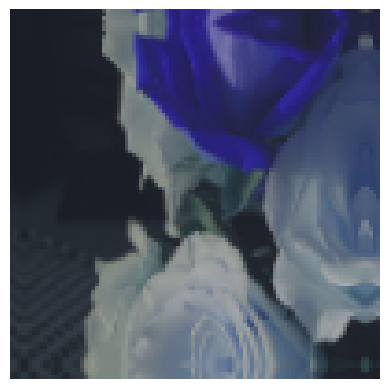

In [89]:
plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [56]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)    

Epoch 1/10
86/86 [==============================] - 36s 404ms/step - loss: 1.3295 - accuracy: 0.4419
Epoch 2/10
86/86 [==============================] - 37s 433ms/step - loss: 1.0730 - accuracy: 0.5745
Epoch 3/10
86/86 [==============================] - 38s 437ms/step - loss: 0.9782 - accuracy: 0.6301
Epoch 4/10
86/86 [==============================] - 38s 442ms/step - loss: 0.9060 - accuracy: 0.6519
Epoch 5/10
86/86 [==============================] - 37s 430ms/step - loss: 0.8492 - accuracy: 0.6828
Epoch 6/10
86/86 [==============================] - 38s 439ms/step - loss: 0.8038 - accuracy: 0.6922
Epoch 7/10
86/86 [==============================] - 32s 375ms/step - loss: 0.7614 - accuracy: 0.7078
Epoch 8/10
86/86 [==============================] - 35s 410ms/step - loss: 0.7309 - accuracy: 0.7271
Epoch 9/10
86/86 [==============================] - 36s 419ms/step - loss: 0.7007 - accuracy: 0.7315
Epoch 10/10
86/86 [==============================] - 41s 479ms/step - loss: 0.6622 - accura

In [101]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 52ms/step - loss: 0.7869 - accuracy: 0.7026


[0.786864161491394, 0.7026143670082092]


predictions = model.predict(X_test_scaled)
predictions

In [102]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 2s 52ms/step


array([[ 1.2298816 ,  6.4429827 , -0.6558552 , -3.4891622 ,  0.6037566 ],
       [ 3.402393  , -0.35892886, -3.9647017 , -2.1752214 ,  2.9494758 ],
       [ 0.9092747 ,  2.2170486 ,  5.147292  , -3.3594553 , -0.22321402],
       ...,
       [ 1.7009882 , -1.0047296 ,  1.3729722 ,  6.0419793 ,  1.4942355 ],
       [ 2.909115  ,  0.06451686, -0.79175335, -3.354546  ,  0.33538795],
       [ 1.743523  , -3.499492  ,  1.3156786 ,  3.9956434 ,  2.4466083 ]],
      dtype=float32)

In [125]:
score = tf.nn.softmax(predictions[3])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.3863885e-01, 4.5104523e-04, 2.3821900e-05, 5.2572154e-03,
       8.5562909e-01], dtype=float32)>

In [126]:
np.argmax(score)

4

In [127]:
y_test[3]

4